<a href="https://colab.research.google.com/github/imrealhelper/Linear-Algebra/blob/main/soft_ware_labs/Midterm_2019s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm exam

__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

---
## Chirp signal

A chirp is a signal in which the frequency increases (up-chirp) or decreases (down-chirp) with time. It is commonly used in radar, sonar, and laser.

In a linear chirp, the instantaneous frequency  $f(t)$ varies exactly linearly with time:

$$
 f(t)=f_{0}+s t
$$

where $f_{0}$ is the starting frequency (in Hz) at time $t=0$, and $s$ is the chirp slope

$$
s=\frac {f_{1}-f_{0}}{T}
$$

where $f_{1}$ is the final frequency. $T$ is the time it takes to sweep from $f_{0}$ to $f_{1}$.

The corresponding time-domain function for the phase of any oscillating signal is the integral of the frequency function, as one expects the phase to grow like

$$
\phi (t+\Delta t)\simeq \phi (t)+2\pi f(t)\Delta t
$$

i.e., that the derivative of the phase is the angular frequency

$$
\frac{d \phi}{dt}=2\pi f(t)
$$

For the linear chirp, this results in:

$$
\begin{aligned}
\phi (t) &=\phi _{0}+2\pi \int _{0}^{t}f(\tau )d\tau \\
&=\phi _{0}+2\pi \int _{0}^{t}\left(f_{0}+s\tau \right)d\tau \\
&=\phi _{0}+2\pi \left(f_{0}t+{\frac {s}{2}}t^{2}\right)
\end{aligned}
$$

where $\phi _{0}$ is the initial phase at time $t=0$. Thus this is also called a quadratic-phase signal.

The corresponding time-domain function for a linear chirp is the exponential of the phase in radians:

$$
{ x(t)=\exp \left( j\phi _{0}+j2\pi \left(f_{0}t+{\frac {s}{2}}t^{2}\right)\right)}
$$

_**(Problem 1a)**_ Define a discrete chirp signal $x_n$, for $n=0, \dots, N-1$
$$
x_n =
\begin{cases}
\exp \left( j\phi _{0}+j2\pi \left(f_{0}t+{\frac {s}{2}}t^{2}\right)\right)
& \quad \text{if } n \le f_\text{s}t_\text{f} \\
0 & \quad \text{otherwise}
\end{cases}
$$

with the following chirp parameters.

- $s$: chirp slope, $1000\ \text{GHz/s}$
- $t_\text{f}$: chirp length, $10 \ \mu \text{s}$
- $f_\text{s}$: sampling rate, $100\ \text{MHz}$
- $f_0$: starting frequency, $0$
- $\phi_0$: initial phase, $0$
- $N$: signal length, $2048$

Show your time-series signal in the following four separate plots; magnitude, phase, real part, and imaginary part.


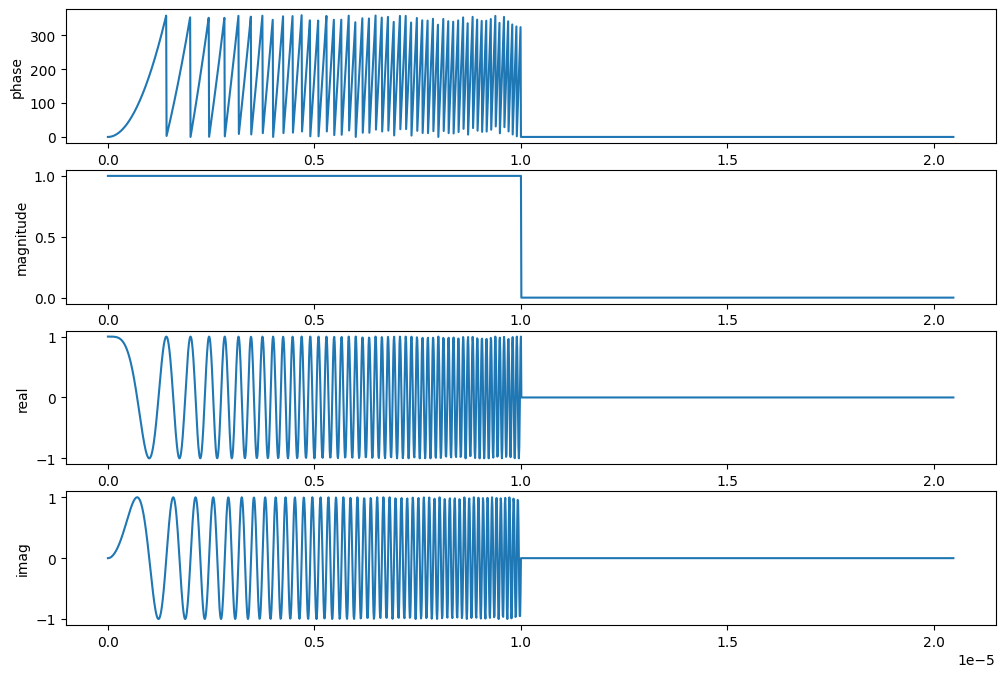

In [97]:
import numpy as np
import matplotlib.pyplot as plt
s = 10**(12)
t_f =10e-6
f_s = 10**(8)
f_0 = 0
initial_phase = 0
N = 2048
dt = 1/f_s

plot_value = {"phase":[],"magnitude":[], "real":[],"imag":[],"x":[]}



for n in range(N):
  if n < t_f*f_s:
    t = n * dt
    phase =  2*np.pi*(s/2 *t**2)
    plot_value["phase"].append(np.rad2deg(phase)%360)
    plot_value["x"].append(np.exp(1j*phase))
    plot_value["magnitude"].append(1)
    plot_value["real"].append(np.cos(2*np.pi*(s/2 *t**2)))
    plot_value["imag"].append(np.sin(2*np.pi*(s/2 *t**2)))
  else:
    plot_value["phase"].append(0)
    plot_value["x"].append(0)
    plot_value["magnitude"].append(0)
    plot_value["real"].append(0)
    plot_value["imag"].append(0)

t = np.linspace(0,dt * 2048,2048)
plt.figure(figsize = [12,8])

for i in range(1,len(plot_value)):
  plt.subplot(4,1,i)
  plt.plot(t,plot_value[list(plot_value.keys())[i-1]])
  plt.ylabel(list(plot_value.keys())[i-1])


plt.show()

_**(Problem 1b)**_ The signal bandwidth in Hz refers to the frequency range in which the signal's intensity is above some threshold value. The threshold value is often defined relative to the maximum value, and in this problem we define it by the -6 dB point, that is the point where the signal intensity drops aproximately to half its maximum value.

Plot the chirp spectrum in the form $20 \log_{10} | X_k |$ versus $f$, where $X_k$ refers to the discrete Fourier transorm of $x_n$. We call this form a dB plot. What is the bandwidth of your chirp signal? Answers to the first most significant digit would suffice.

In [98]:

x = np.array(plot_value["x"])
print(x)
print(np.shape(x))

[1.        +0.j         0.99999995+0.00031416j 0.99999921+0.00125664j ...
 0.        +0.j         0.        +0.j         0.        +0.j        ]
(2048,)


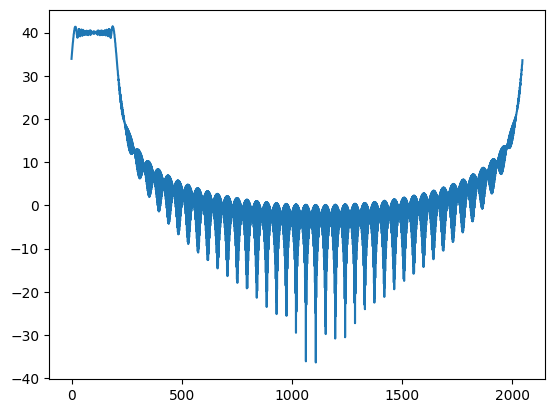

In [100]:
X = np.fft.fft(x)
X_f = []
for i in range(len(X)):
  X_f.append(20*np.log10(np.sqrt(np.real(X[i])**2 + np.imag(X[i])**2)))
X_f = np.array(X_f)

plt.plot(X_f)

---
## Spread of HIV infection

The human immunodeficiency virus (HIV) infection spreads and can develop into acquired immunodeficiency syndrome (AIDS). AIDS can lead to immune system failure and eventual inability to defend the body against infection or cancer. Without treatment with antiretroviral drugs, survival time after infection with HIV is about 9 to 11 years, depending on a number of factors. Antiretroviral drugs such as TDF (tenofovir), either 3TC (lamivudine) or FTC (emtricitabine), and EFV (efavirenz) are recommended by the World Health Organization as soon as HIV infection is diagnosed. This simulation predicts the spread of HIV infection in a body with an initial infection.

The spread of HIV in a patient is approximated with balance equations on (H)ealthy, (I)nfected, and (V)irus population counts.

- $H(t)$: number of healthy cells at time $t$
- $I(t)$: number of infected cells at time $t$
- $V(t)$: number of virus cells at time $t$

The dynamical relations bewteen those three variables can be modeled by the following nonlinear differential equations.

\begin{align*}
  \dot{H} &= k_1 - k_2 H - k_3 H V \\
  \dot{I} &= k_3 HV - k_4 I \\
  \dot{V} &= -k_3 HV - k_5 V + k_6 I
\end{align*}

There are six parameters ($k_1, \dots, k_6$) in the model that provide the rates of cell death, infection spread, virus replication, and other processes that determine the spread of HIV in the body. Note that the time unit is years.

- $k_1$: new healthy cells per year (=100000)
- $k_2$: death rate of healthy cells (=0.1)
- $k_3$: healthy cells converting to infected cells (=0.0000002)
- $k_4$: death rate of infected cells (=0.5)
- $k_5$: death rate of virus (=5)
- $k_6$: production of virus by infected cells (=60)

We suppose that the patient is in "_critical_" state when the number of infected cells exceeds the number of healthy cells. We are especially interested in anticipating when this event happens.

In this problem, we consider the HIV infection of a patient with the current condition of $H(0)=1000000$, $I(0)=0$, $V(0)=100$.



_**(Problem 2a)**_ Simulate the HIV infection up to the next 20 years ($t=20$) and show how $H(t)$, $I(t)$, and $V(t)$ evolve in time.  



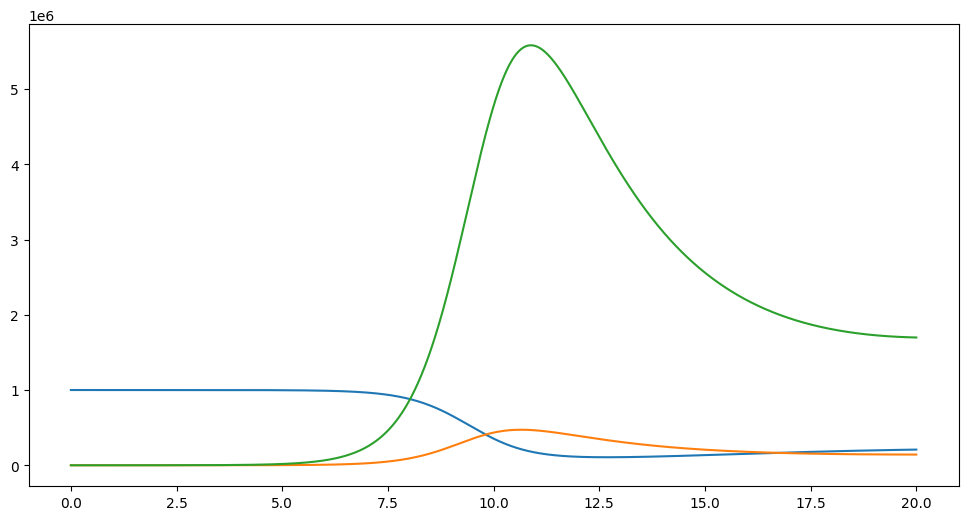

In [132]:
# your code here


def state_space(value,system):
  H,I,V = value
  k1 = system["k1"]
  k2 = system["k2"]
  k3 = system["k3"]
  k4 = system["k4"]
  k5 = system["k5"]
  k6 = system["k6"]
  H_dot = k1 - k2*H - k3*H*V
  I_dot = k3*H*V - k4*I
  V_dot = -k3*H*V -k5*V + k6*I
  return np.array([H_dot,I_dot,V_dot])


def simulate(initial_value, system,n,t_f):
  t = np.array([t_f/n *i for i in range(n)])
  current = 0
  HIV = np.zeros([n,3])
  HIV[0] = initial_value
  s = 0
  for i in range(len(t)-1):
    if i == 0:
      current = state_space(initial_value,system)* t_f/n + initial_value
      HIV[i+1] = current
    else:
      current = state_space(current,system)* t_f/n + current
      HIV[i+1] = current
  return HIV

system = {"k1" : 100000,"k2" :0.1,"k3" : 0.0000002,"k4" : 0.5,  "k5" : 5,    "k6" : 60}

t_f = 20
n = 20000
initial_value = np.array([1000000,0,100])
t = np.array([t_f/n *i for i in range(n)])
result = simulate(initial_value, system,n,t_f)
plt.figure(figsize = (12,6))
plt.plot(t,result)
plt.show()

_**(Problem 2b)**_ Recall that the patient's condition is extremely bad (_critical_) when the number of infected cells starts to exceed the number of healthy cells. When do you anticipate that to happen? Present the plot that clearly justifies your answer.




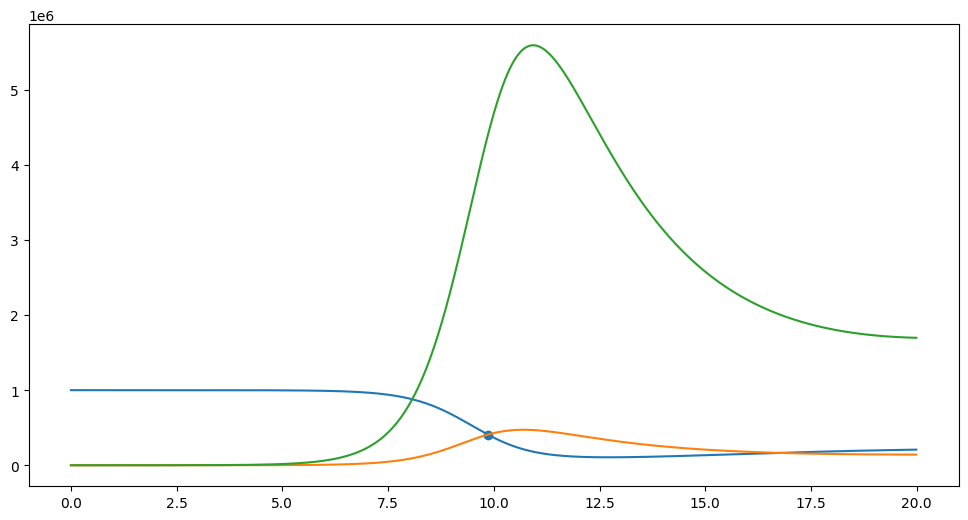

In [119]:
plt.figure(figsize = (12,6))
plt.plot(t,result)
plt.scatter(t[np.min(np.where(result[:,0] < result[:,1]))] , result[np.min(np.where(result[:,0] < result[:,1])),0])
plt.show()

_**(Problem 2c)**_ Now you are suggesting a new antiretroviral drug. The drug treatment affects the dynamics for the healthy cells as well as the virus cells, that is,

\begin{align*}
  \dot{H} &= k_1 - k_2 H - k_3 H V - D_H \\
  \dot{I} &= k_3 HV - k_4 I \\
  \dot{V} &= -k_3 HV - k_5 V + k_6 I - D_V
\end{align*}

where $D_H$ and $D_V$ can be interpreted by the number of healthy cells and the number of virus cells that a drug treatment reduces  every year.

From extensive clinical trials and inspections, you are now able to conclude that the following two candidate treatments may be used.

- Treatment A:
$$
\begin{aligned}
  D_H &= 0 \\
  D_V &= 2V
\end{aligned}
$$

- Treatment B:
$$
\begin{aligned}
  D_H &= 10^{-6}H \\
  D_V &= 4\times 10^{-6}V^2  
\end{aligned}
$$

Based on your mathematical models, which of the above would you suggest for the patient? Present the plots that clearly justify your answer.




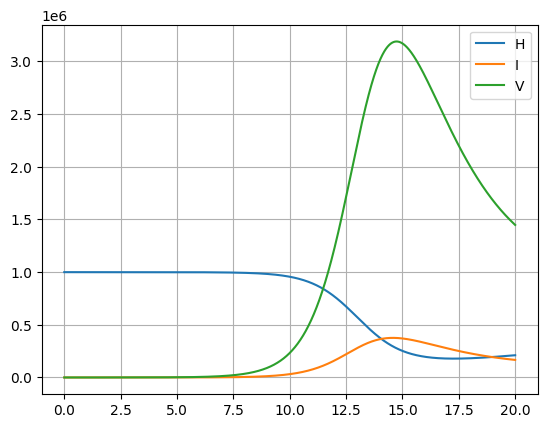

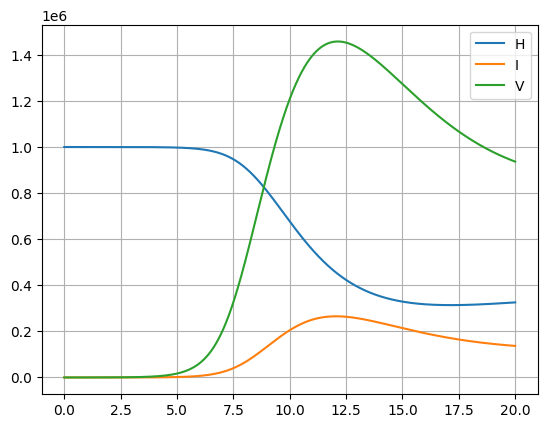

In [131]:
# your code here


def state_space_A(value,system):
  H,I,V = value
  k1 = system["k1"]
  k2 = system["k2"]
  k3 = system["k3"]
  k4 = system["k4"]
  k5 = system["k5"]
  k6 = system["k6"]
  DH = 0
  DV = 2*V
  H_dot = k1 - k2*H - k3*H*V - DH
  I_dot = k3*H*V - k4*I
  V_dot = -k3*H*V -k5*V + k6*I - DV
  return np.array([H_dot,I_dot,V_dot])

def state_space_B(value,system):
  H,I,V = value
  k1 = system["k1"]
  k2 = system["k2"]
  k3 = system["k3"]
  k4 = system["k4"]
  k5 = system["k5"]
  k6 = system["k6"]
  DH = 10**(-6) * H
  DV = 4*10**(-6) * V**2
  H_dot = k1 - k2*H - k3*H*V - DH
  I_dot = k3*H*V - k4*I
  V_dot = -k3*H*V -k5*V + k6*I - DV
  return np.array([H_dot,I_dot,V_dot])

def simulate(func,initial_value, system,n,t_f):
  t = np.array([t_f/n *i for i in range(n)])
  current = 0
  HIV = np.zeros([n,3])
  HIV[0] = initial_value
  s = 0
  for i in range(len(t)-1):
    if i == 0:
      current = func(initial_value,system)* t_f/n + initial_value
      HIV[i+1] = current
    else:
      current = func(current,system)* t_f/n + current
      HIV[i+1] = current
  return HIV
initial_value = np.array([1000000,0,100])

resultA = simulate( state_space_A,initial_value, system,n,t_f)
resultB =  simulate( state_space_B,initial_value, system,n,t_f)

name = ["H","I","V"]

for i in range(3):
  plt.plot(t, resultA[:,i],label = name[i])

plt.legend()
plt.grid()
plt.show()
for i in range(3):
  plt.plot(t, resultB[:,i],label = name[i])
plt.legend()
plt.grid()
plt.show()

